In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [153]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [152]:
df.shape

(53940, 10)

In [154]:
#Check for nulls. There are none.
print(df.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


<h2>1. Summary Statistics</h2>

In [4]:
#Check summary statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h2>2. Plotting target and feature variables</h2>

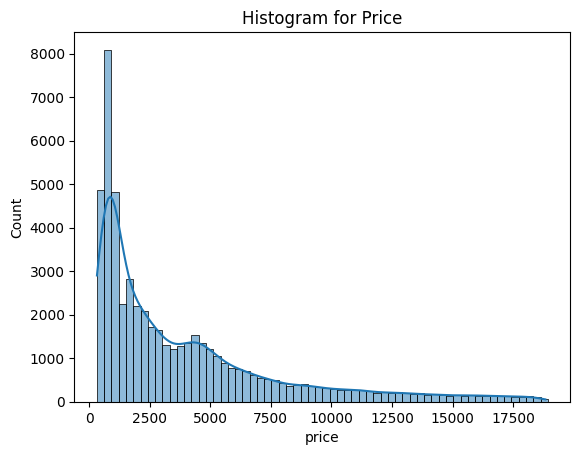

In [5]:
## Price is a skewed distribution, as can be seen from the summary statistics as well. Plotting its histogram.
sns.histplot(data = df, x = "price", binwidth = 300, kde = True)
plt.title("Histogram for Price")
plt.show()

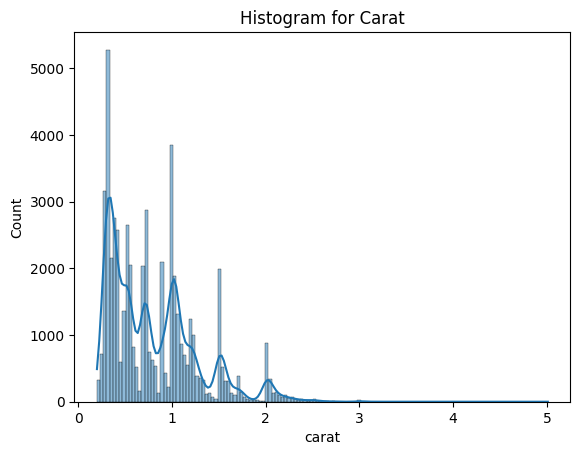

In [9]:
## Carat is a skewed distribution, as can be seen from the summary statistics as well. Plotting its histogram.
sns.histplot(data = df, x = "carat", kde = True)
plt.title("Histogram for Carat")
plt.show()

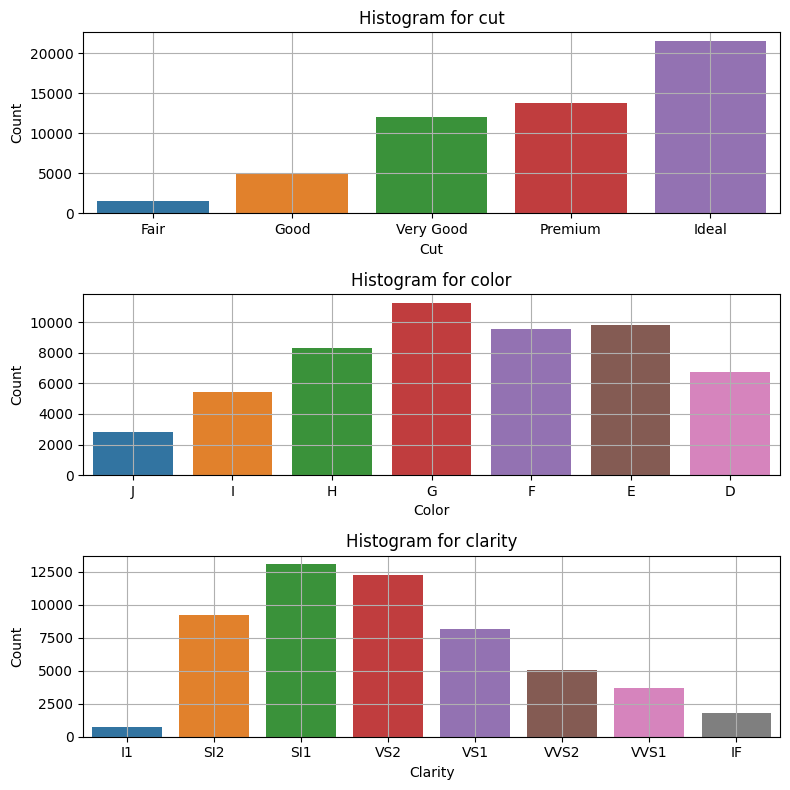

In [156]:
# Applying custom categorical order - Color
ColorLabels = ['J','I','H','G','F', 'E', 'D']
Color_catType = CategoricalDtype(categories = ColorLabels, ordered = True)
df['color'] = df['color'].astype(Color_catType)

# Applying custom categorical order - Cut
CutLabels = ['Fair','Good','Very Good','Premium','Ideal']
Cut_catType = CategoricalDtype(categories = CutLabels, ordered = True)
df['cut'] = df['cut'].astype(Cut_catType)

# Applying custom categorical order - Clarity
ClarityLabels = ['I1','SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
Clarity_catType = CategoricalDtype(categories = ClarityLabels, ordered = True)
df['clarity'] = df['clarity'].astype(Clarity_catType)


# Selecting 3 features for plotting
selected_features = ['cut', 'color', 'clarity']

# Create a 3x1 grid for the scatter plots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Create scatter plots for continuous features
for i, feature in enumerate(selected_features):
    sns.countplot(data=df, x=feature, ax=axs[i])
    axs[i].set_xlabel(feature.title())
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Histogram for {feature}')
    axs[i].grid(True)

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

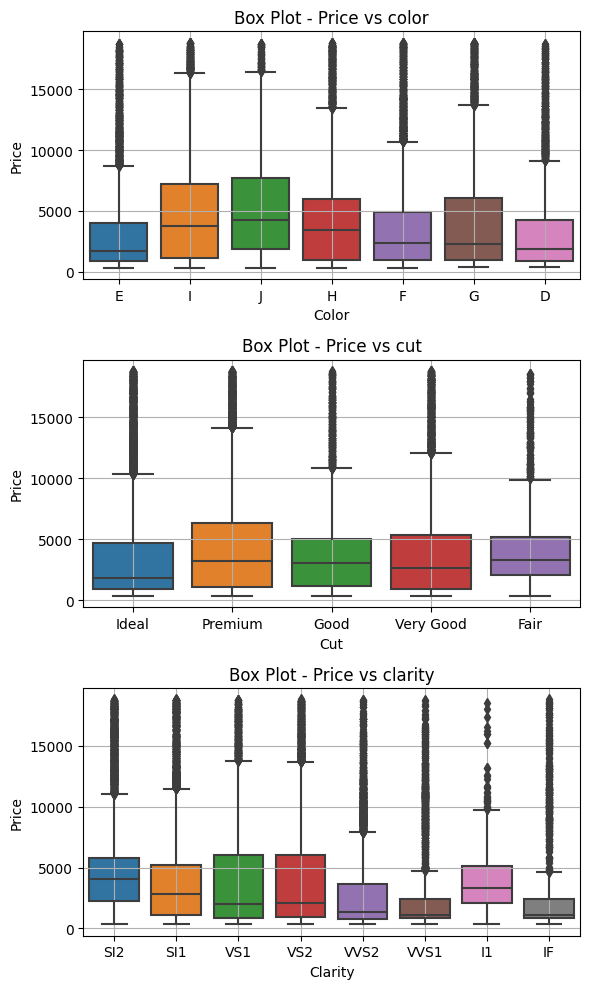

In [154]:
### Plotting the 3 categorical variables vs Price

# Create a 3x1 grid for the box plots
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Loop for 3 categorical features: 'color', 'cut', and 'clarity'
categorical_features = ['color', 'cut', 'clarity']
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y='price', ax=axs[i])
    axs[i].set_title(f'Box Plot - Price vs {feature}')
    axs[i].set_ylabel('Price')
    axs[i].set_xlabel(feature.title())
    axs[i].grid(True)

plt.tight_layout()

# Show the plots
plt.show()

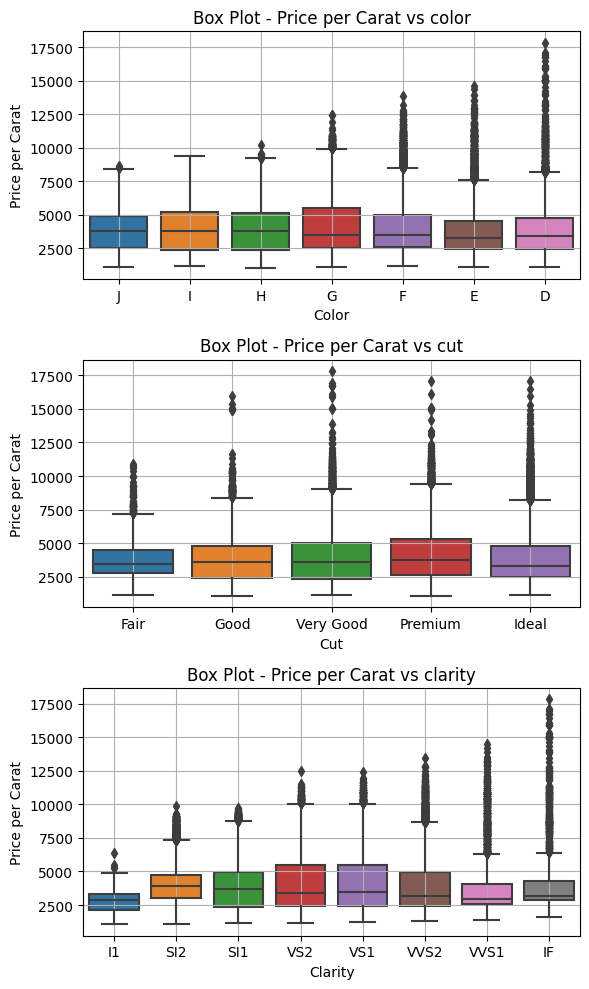

In [157]:
### Plotting the 3 categorical variables vs PriceperCarat

df['pricepercarat'] = df['price']/df['carat']

# Create a 3x1 grid for the box plots
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Loop for 3 categorical features: 'color', 'cut', and 'clarity'
categorical_features = ['color', 'cut', 'clarity']
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y='pricepercarat', ax=axs[i])
    axs[i].set_title(f'Box Plot - Price per Carat vs {feature}')
    axs[i].set_ylabel('Price per Carat')
    axs[i].set_xlabel(feature.title())
    axs[i].grid(True)

plt.tight_layout()

# Show the plots
plt.show()

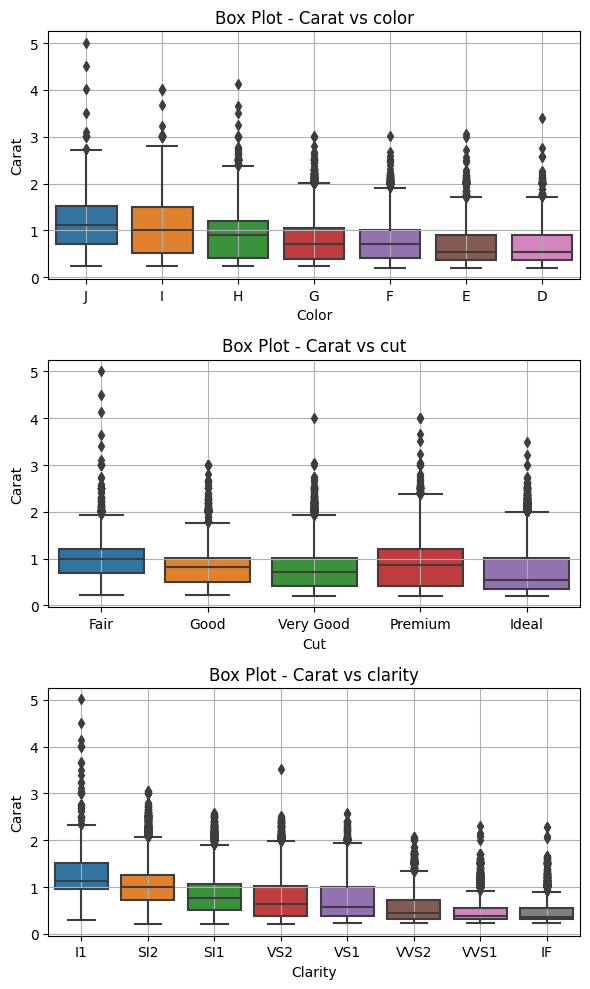

In [158]:
### Plotting the 3 categorical variables vs Carat


# Create a 3x1 grid for the box plots
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Loop for 3 categorical features: 'color', 'cut', and 'clarity'
categorical_features = ['color', 'cut', 'clarity']
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y='carat', ax=axs[i])
    axs[i].set_title(f'Box Plot - Carat vs {feature}')
    axs[i].set_ylabel('Carat')
    axs[i].set_xlabel(feature.title())
    axs[i].grid(True)

plt.tight_layout()

# Show the plots
plt.show()

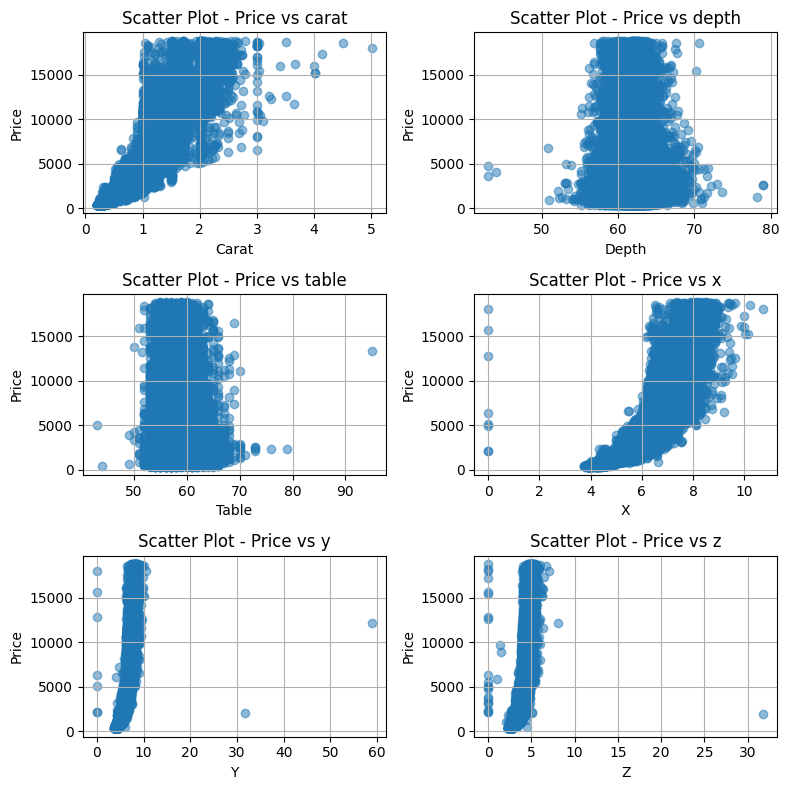

In [12]:
# Selecting 6 continuous features for plotting
selected_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Create a 3x2 grid for the scatter plots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))
axs = axs.ravel()

# Create scatter plots for continuous features
for i, feature in enumerate(selected_features):
    axs[i].scatter(df[feature], df['price'], alpha=0.5)
    axs[i].set_xlabel(feature.title())
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'Scatter Plot - Price vs {feature}')
    axs[i].grid(True)

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

<h2>3. Data Preprocessing</h2>
<h3>Transforming Categorical Variables</h3>

In [14]:
### Ordinal encoding for categorical variables, as the variables are ordered
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good' : 3,
    'Premium' : 4,
    'Ideal' : 5
}
color_map = {
    'J' : 1,
    'I' : 2,
    'H' : 3,
    'G' : 4,
    'F' : 5,
    'E' : 6,
    'D' : 7
}
clarity_map = {
    'I1' : 1,
    'SI2' : 2,
    'SI1' : 3,
    'VS2' : 4,
    'VS1' : 5,
    'VVS2' : 6,
    'VVS1' : 7,
    'IF' : 8
}
df_processed = df.copy()
df_processed['cut_encoded'] = df_processed.cut.map(cut_map)
df_processed['color_encoded'] = df_processed.color.map(color_map)
df_processed['clarity_encoded'] = df_processed.clarity.map(clarity_map)

In [15]:
df_processed.shape

(53940, 13)

In [17]:
# Remove the original categorical columns
df_processed.drop(['cut', 'color', 'clarity'], axis = 1, inplace = True)
df_processed = df_processed.astype(float)
df_processed.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,5.0,6.0,2.0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,4.0,6.0,3.0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,2.0,6.0,5.0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,4.0,2.0,4.0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,2.0,1.0,2.0


Text(0.5, 1.0, 'Pearson Correlation of Input Data')

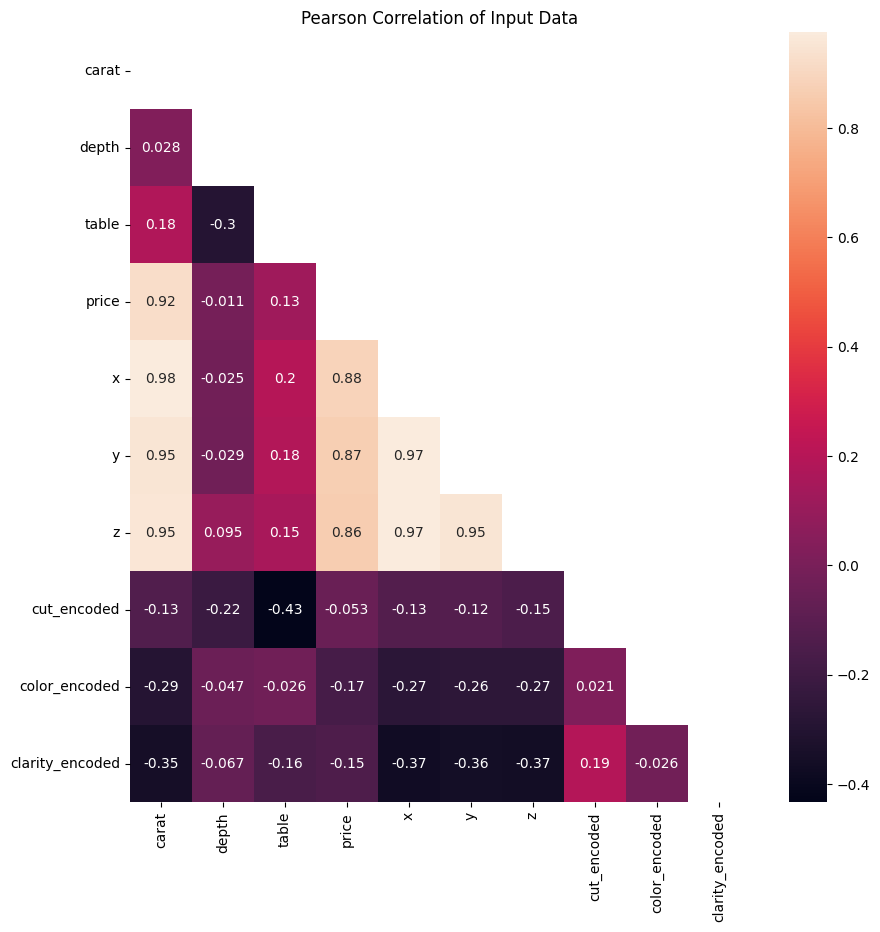

In [159]:
# Compute correlations matrix
corr_matrix = df_processed.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = corr_matrix, annot = True, mask = np.triu(corr_matrix)).set_title('Pearson Correlation of Input Data')

In [143]:
#Extract target and features
target = df_processed['price']
features = df_processed.drop(columns = ['price', 'x', 'z'], axis = 1)

feature_names = features.columns.values


In [293]:
df_processed.describe()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.904097,4.405803,4.051020
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.701105,1.647136
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,8.000000


In [279]:
# Normalize the features
features = StandardScaler().fit_transform(features)

In [144]:
print(feature_names)

['carat' 'depth' 'table' 'y' 'cut_encoded' 'color_encoded'
 'clarity_encoded']


<h2>4. Linear Regression</h2>

In [145]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 10)

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [146]:
# Compute mean squared error and R2 scores as metrics
LR_MSE = metrics.mean_squared_error(y_test, y_pred)
LR_R2  = metrics.r2_score(y_test, y_pred)
print(f'Mean Squared Error: {LR_MSE}, R2 Score: {LR_R2}')

Mean Squared Error: 1537614.4156463167, R2 Score: 0.9059234986386937


In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 10)

In [147]:
# Also, use statsmodels for Linear Regression, to see the coefficients. 


X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.890e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:33:40   Log-Likelihood:            -3.6802e+05
No. Observations:               43152   AIC:                         7.361e+05
Df Residuals:                   43144   BIC:                         7.361e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             205.0761    448.985     

<h2>5. Random Forest Regression</h2>

In [148]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 10)

RF = RandomForestRegressor()
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [149]:
# Compute mean squared error and R2 score as metrics
RF_MSE = metrics.mean_squared_error(y_test, y_pred)
RF_R2  = metrics.r2_score(y_test, y_pred)
print(f'Mean Squared Error: {RF_MSE}, R2 Score: {RF_R2}')

Mean Squared Error: 288169.13403616636, R2 Score: 0.9823688281960828


In [150]:
print(len(RF.feature_importances_))

7


In [151]:
## Print out feature importance
for i in range(len(RF.feature_importances_)):
    print(f'Importance of feature x{i+1}:{feature_names[i]} is {round(RF.feature_importances_[i], 4)}')
    

Importance of feature x1:carat is 0.6045
Importance of feature x2:depth is 0.0054
Importance of feature x3:table is 0.0031
Importance of feature x4:y is 0.2906
Importance of feature x5:cut_encoded is 0.0022
Importance of feature x6:color_encoded is 0.0317
Importance of feature x7:clarity_encoded is 0.0625


In [148]:
print(len(features))

53940


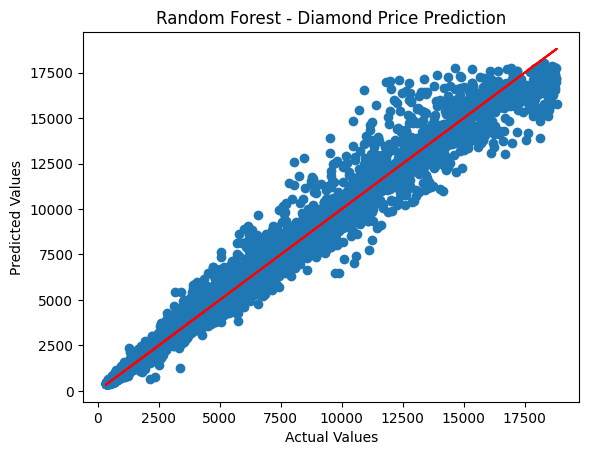

In [285]:
### Plot - Random Forest Regression 
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'red')
plt.title('Random Forest - Diamond Price Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<h2>Backup Slides</h2>

In [20]:
df_new = pd.get_dummies(data=df, columns=['cut', 'color', 'clarity'])
df_new.shape


(53940, 27)

In [21]:
df_new.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Very Good', 'cut_Premium', 'cut_Ideal', 'color_J',
       'color_I', 'color_H', 'color_G', 'color_F', 'color_E', 'color_D',
       'clarity_I1', 'clarity_SI2', 'clarity_SI1', 'clarity_VS2',
       'clarity_VS1', 'clarity_VVS2', 'clarity_VVS1', 'clarity_IF'],
      dtype='object')

Text(0.5, 1.0, 'Pearson Correlation of Input Data')

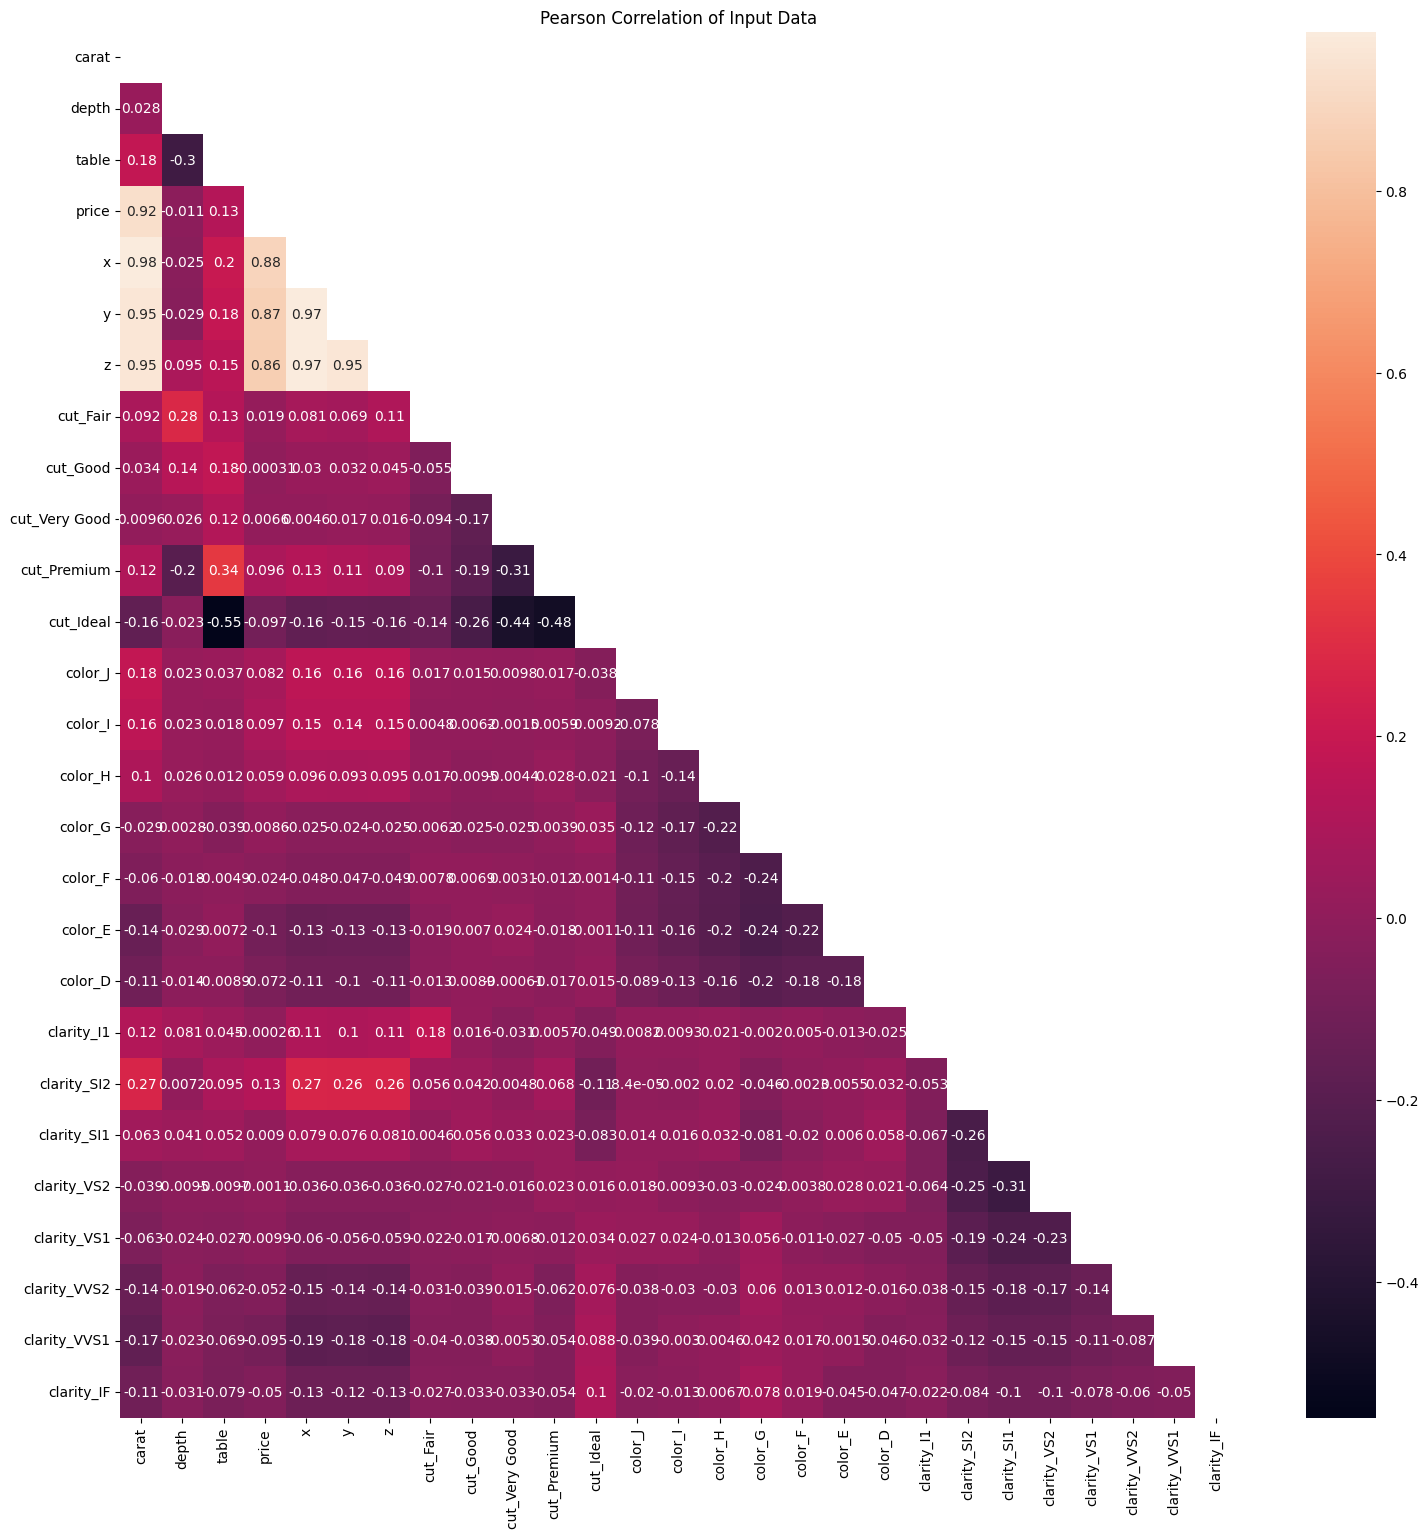

In [23]:
# Compute correlations matrix
corr_matrix = df_new.corr()
plt.figure(figsize=(18,18))
sns.heatmap(data = corr_matrix, annot = True, mask = np.triu(corr_matrix)).set_title('Pearson Correlation of Input Data')

In [140]:
#Extract target and features
target = df_new['price']
df_new['vol'] = df_new['x']*df_new['y']*df_new['z']
features = df_new.drop(columns = ['price', 'table','cut_Good', 'color_E', 'clarity_VVS1', 'x', 'z', 'vol',  'depth'], axis = 1)

feature_names = features.columns.values


In [129]:
print(feature_names)

['carat' 'y' 'cut_Fair' 'cut_Very Good' 'cut_Premium' 'cut_Ideal'
 'color_J' 'color_I' 'color_H' 'color_G' 'color_F' 'color_D' 'clarity_I1'
 'clarity_SI2' 'clarity_SI1' 'clarity_VS2' 'clarity_VS1' 'clarity_VVS2'
 'clarity_IF']


In [57]:
# Normalize the features
features = StandardScaler().fit_transform(features)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 10)

RF = RandomForestRegressor()
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [133]:
# Compute mean squared error and R2 score as metrics
RF_MSE = metrics.mean_squared_error(y_test, y_pred)
RF_R2  = metrics.r2_score(y_test, y_pred)
print(f'Mean Squared Error: {RF_MSE}, R2 Score: {RF_R2}')

Mean Squared Error: 322391.1320442807, R2 Score: 0.9802750094796111


In [134]:
print(len(RF.feature_importances_))

19


In [139]:
## Print out feature importance
for i in range(len(RF.feature_importances_)):
    print(f'Importance of feature x{i+1}:{feature_names[i]} is {round(RF.feature_importances_[i],4)}')
    

Importance of feature x1:carat is 0.5962
Importance of feature x2:y is 0.3034
Importance of feature x3:cut_Fair is 0.0005
Importance of feature x4:cut_Very Good is 0.0007
Importance of feature x5:cut_Premium is 0.0009
Importance of feature x6:cut_Ideal is 0.0017
Importance of feature x7:color_J is 0.0111
Importance of feature x8:color_I is 0.0084
Importance of feature x9:color_H is 0.0067
Importance of feature x10:color_G is 0.0027
Importance of feature x11:color_F is 0.0008
Importance of feature x12:color_D is 0.0028
Importance of feature x13:clarity_I1 is 0.0141
Importance of feature x14:clarity_SI2 is 0.0199
Importance of feature x15:clarity_SI1 is 0.0148
Importance of feature x16:clarity_VS2 is 0.0074
Importance of feature x17:clarity_VS1 is 0.0058
Importance of feature x18:clarity_VVS2 is 0.0013
Importance of feature x19:clarity_IF is 0.0007


In [41]:
X_train_numeric.dtypes

const            float64
carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
cut_Fair            bool
cut_Good            bool
cut_Very Good       bool
cut_Premium         bool
cut_Ideal           bool
color_J             bool
color_I             bool
color_H             bool
color_G             bool
color_F             bool
color_E             bool
color_D             bool
clarity_I1          bool
clarity_SI2         bool
clarity_SI1         bool
clarity_VS2         bool
clarity_VS1         bool
clarity_VVS2        bool
clarity_VVS1        bool
clarity_IF          bool
dtype: object

In [130]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 10)

In [131]:
# Convert boolean columns to numeric (integer) data types
X_train_numeric = X_train.astype(int)

# Add constant and fit the model
X_train_numeric = sm.add_constant(X_train_numeric)
model = sm.OLS(y_train, X_train_numeric).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:59:41   Log-Likelihood:            -3.7882e+05
No. Observations:               43152   AIC:                         7.577e+05
Df Residuals:                   43132   BIC:                         7.579e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6239.7616     65.316    -95.532

In [141]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 10)

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [142]:
# Compute mean squared error and R2 scores as metrics
LR_MSE = metrics.mean_squared_error(y_test, y_pred)
LR_R2  = metrics.r2_score(y_test, y_pred)
print(f'Mean Squared Error: {LR_MSE}, R2 Score: {LR_R2}')

Mean Squared Error: 1325838.2056020459, R2 Score: 0.918880690448155


Text(0.5, 1.0, 'Pearson Correlation of Input Data')

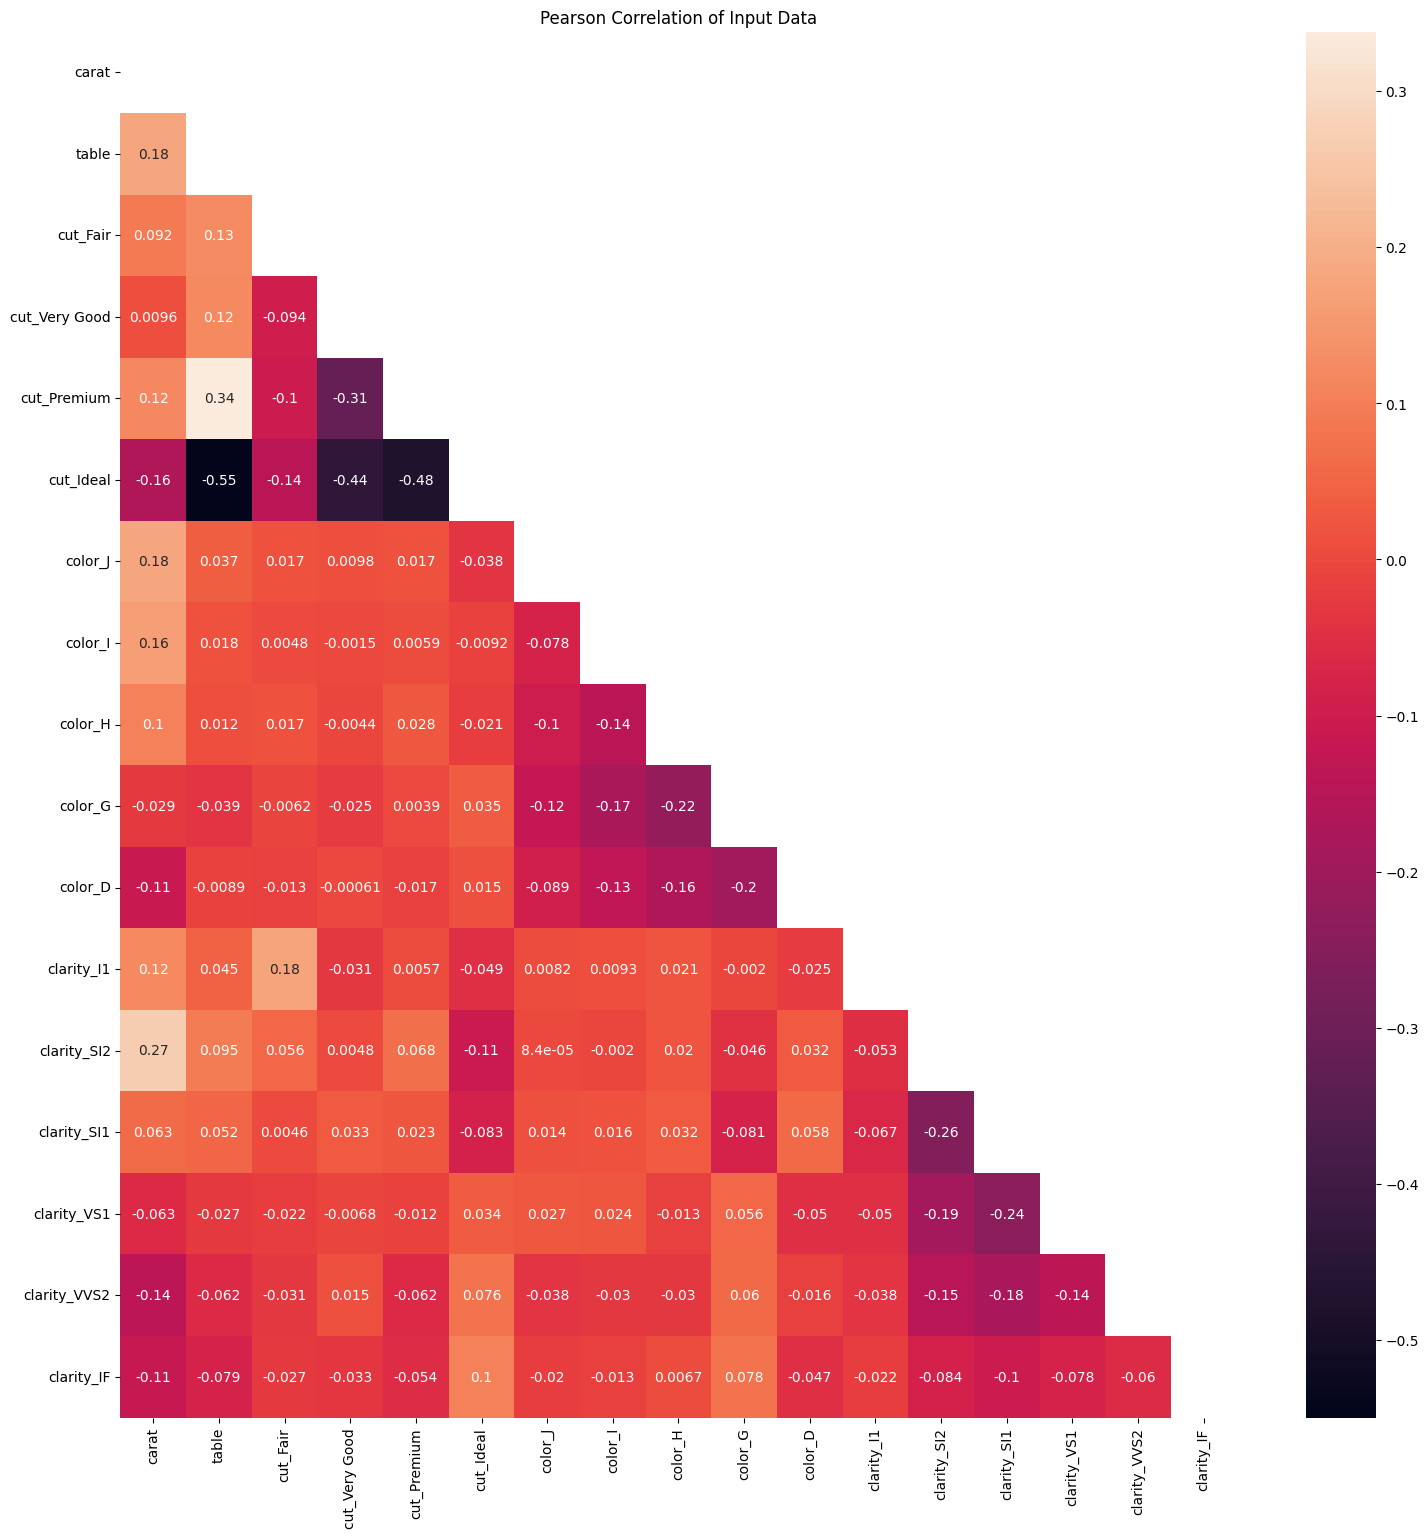

In [87]:
# Compute correlations matrix
df_matrix = df_new.drop(columns = [ 'cut_Good', 'color_E', 'clarity_VVS1', 'x', 'y', 'z'], axis = 1)
corr_matrix = features.corr()
plt.figure(figsize=(18,18))
sns.heatmap(data = corr_matrix, annot = True, mask = np.triu(corr_matrix)).set_title('Pearson Correlation of Input Data')